### Training of a modernised variant of Yann LeCun's LeNet-5 on the MNIST Dataset

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
np.random.seed(123)

from keras.datasets import mnist
from keras.models import Sequential 
from keras.layers.core import Dense, Dropout, Activation, Flatten
from keras.layers.convolutional import Convolution2D, MaxPooling2D
from keras.utils import np_utils
from keras import backend as K

Using Theano backend.
WARNING (theano.sandbox.cuda): The cuda backend is deprecated and will be removed in the next release (v0.10).  Please switch to the gpuarray backend. You can get more information about how to switch at this URL:
 https://github.com/Theano/Theano/wiki/Converting-to-the-new-gpu-back-end%28gpuarray%29

Using gpu device 0: GeForce GT 750M (CNMeM is disabled, cuDNN 5105)


### Preparation of Image Data

In [2]:
batch_size = 128 # Number of images processed at once
nb_classes = 10  # 10 Digits from 0 to 9

# Dimensionen of the input images (28x28 pixel)
img_rows, img_cols = 28, 28

# Load image data with labels, split into test and training set 
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# reshape images in 4D tensor (N images, 1 channel, 28 rows, 28 columns) 
# rescale pixels range from [0, 255] to [0, 1]
X_train = X_train.reshape(X_train.shape[0], 1, img_rows, img_cols)
X_test = X_test.reshape(X_test.shape[0], 1, img_rows, img_cols)
X_train = X_train.astype("float32")
X_test = X_test.astype("float32")
X_train /= 255
X_test /= 255
print('X_train shape: ', X_train.shape)
print(X_train.shape[0], "training samples")
print(X_test.shape[0], "test samples")

# convert digit labels (0-9) in one-hot encoded binary vectors. 
# These correspond to the training/test labels at the output of the net. 
Y_train = np_utils.to_categorical(y_train, nb_classes)
Y_test = np_utils.to_categorical(y_test, nb_classes)
print("One-hot encoding of {}: {}".format(y_train[0], Y_train[0, :]))



X_train shape:  (60000, 1, 28, 28)
60000 training samples
10000 test samples
One-hot encoding of 5: [ 0.  0.  0.  0.  0.  1.  0.  0.  0.  0.]


Show bitmaps of the first 9 trainings images.

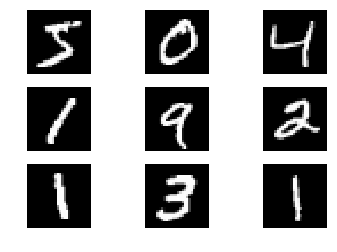

In [3]:
for i in range(9):
    plt.subplot(3,3, i+1)
    plt.imshow(X_train[i, 0], cmap='gray')
    plt.axis('off')

### Define LeNet-5 Network Model

In [4]:
model = Sequential()

# Convolution2D(number_filters, row_size, column_size, input_shape=(number_channels, img_col))
model.add(Convolution2D(6, 5, 5, input_shape=[1, img_rows, img_cols], border_mode='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Convolution2D(16, 5, 5, border_mode='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Convolution2D(120, 5, 5))
model.add(Activation('relu'))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(84))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(10))
model.add(Activation('softmax'))


### Train Model

In [5]:
model.compile(loss='categorical_crossentropy', optimizer='adadelta', metrics=['accuracy'])

In [6]:
nb_epoch = 2 # Number of passes over all pictures of the training set

model.fit(X_train, Y_train, batch_size=batch_size, nb_epoch=nb_epoch, 
          verbose=1, validation_data=(X_test, Y_test))

score =  model.evaluate(X_test, Y_test, verbose=0)
print('Test score', score[0])
print('Test accuracy', score[1])

Train on 60000 samples, validate on 10000 samples
Epoch 1/2
60000/60000 [==============================] - 13s - loss: 0.4180 - acc: 0.8715 - val_loss: 0.0830 - val_acc: 0.9725

### Visualisierung of some test images and their inferred classification

9/9 [==============================] - 0s


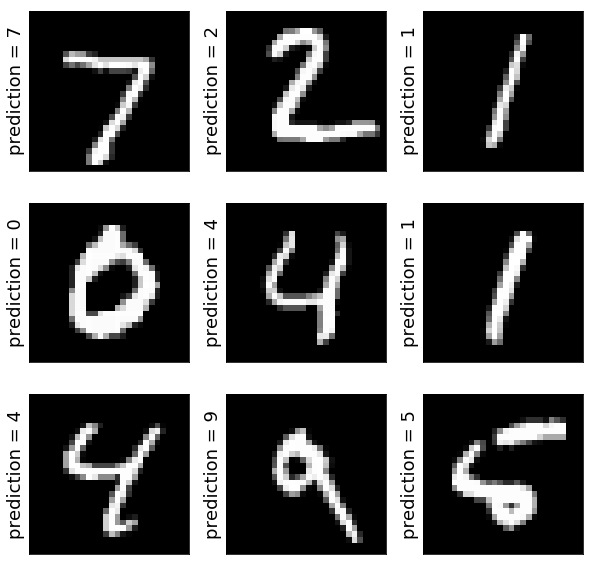

In [7]:
res = model.predict_classes(X_test[:9])
plt.figure(figsize=(10, 10))

for i in range(9):
    plt.subplot(3, 3, i+1)
    plt.imshow(X_test[i, 0], cmap='gray')
    plt.gca().get_xaxis().set_ticks([])
    plt.gca().get_yaxis().set_ticks([])
    plt.ylabel("prediction = {}".format(res[i]), fontsize=18)